In [1]:
%matplotlib inline

In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from hamiltonian import initialize_heisenberg_1d

import jax.numpy as np

from time import time
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


Complex_warning = True
pbc = True
J = 1
lr = 1e-02
print_every =  10
batch_size = 100
num_spins = 10
epochs = 200
seed = 0
width = 12
filter_size = 3

if Complex_warning:
    warnings.filterwarnings(
            "ignore",
            message="Casting complex values to real discards the imaginary part",
        )

# def callback(params, i, ax, fig):
#     E, mag, var, epochs, epoch_mod, gs_energy = params
#     if i > 0 and i % epoch_mod == 0 or i == epochs - 1:
#         ax.cla()
#         ax.axhline(gs_energy, label="Exact Energy", color="r")
#         ax.plot(E, label="Energy")
#         ax.plot(mag, label="Magnetization")
#         ax.plot(var, label="Variance")
#         ax.legend()
# #         plt.draw()
#         display(fig)
#         clear_output(wait = True)
#         plt.pause(1.0 / 60.0)

In [17]:
step, opt_state, key = initialize_heisenberg_1d(
        width,
        filter_size,
        seed,
        num_spins,
        lr,
        J,
        batch_size,
        pbc,
    )

if pbc:
    if J == 1:
        gs_energy = num_spins * (1 / 4 - np.log(2))
    elif J < 0:
        gs_energy = J * num_spins / 4
    else:
        gs_energy = np.nan

E = []
E_imag = []
mag = []
E_var = []
epoch = []
Time = []
print("exact energy: ", gs_energy)

start = time()
old_time = time()

print("Step\tEnergy\tMagnetization\tVariance\ttime/step")
print("---------------------------------------------------------")

for i in range(epochs):
    opt_state, key, energy, e_imag, magnetization, var = step(i, opt_state, key)
    E.append(energy)
    E_imag.append(e_imag)
    mag.append(magnetization)
    E_var.append(var.real)
    epoch.append(i)
    now = time()
    Time.append(now - start)
    if i % print_every == 0 and i > 0:
        new_time = time()
        print(
            "{}\t{:.2f}\t{:.2f}\t{:.3f}\t{:.2f}".format(
                i, energy, magnetization, var.real, new_time - old_time
            )
        )
        old_time = new_time

exact energy:  -4.431472
Step	Energy	Magnetization	Variance	time/step
---------------------------------------------------------
10	-1.83	-0.70	1.624	120.37
20	-2.49	0.02	0.010	1.27
30	-2.49	-0.02	0.010	1.12
40	-2.50	0.00	0.000	1.11
50	-2.50	0.00	0.000	1.12
60	-2.49	0.02	0.010	1.13
70	-2.50	0.00	0.000	1.37
80	-2.50	0.00	0.000	1.76
90	-2.50	0.00	0.000	1.15
100	-2.50	0.00	0.000	1.75
110	-2.50	0.00	0.000	1.78
120	-2.50	0.00	0.000	1.45
130	-2.50	0.00	0.000	1.32
140	-2.50	0.00	0.000	1.18
150	-2.50	0.00	0.000	1.13
160	-2.50	0.00	0.000	1.17
170	-2.50	0.00	0.000	1.13
180	-2.50	0.00	0.000	1.14
190	-2.50	0.00	0.000	1.15


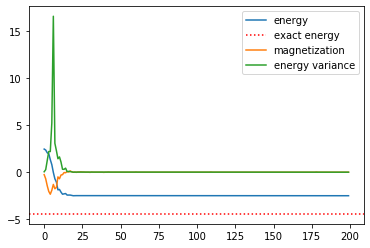

In [18]:
plt.plot(E, label='energy')
plt.axhline(gs_energy, label='exact energy',linestyle=':', color="r")
plt.plot(mag, label='magnetization')
plt.plot(E_var, label='energy variance')
plt.legend()
plt.show()